In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
pip install -q pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\diana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [9]:
df = pd.read_csv('video_juegos_populares.csv')
#df.rename(columns={
 #   'Country/Region':'Paises',
  #  'New cases':'nCases',
   # 'New deaths':'nDeaths'
#},inplace=True)
df.fillna(50)
df.head(10)
for k in df.Platform.unique():
    if type(k)==str:
        df['P_' + k] = (df.Platform==k)*1

#df['ConfirmedNext'] = (df.Confirmed>=30000)*1
#df.loc[:, 'deathasN'] = 0
#df.loc[df.Deaths.isna(), 'deathasN'] = 1
df.head(10)




,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,P_GB,P_DS,P_X360,P_PS3,P_3DS,P_N64,P_Atari_2600,P_WS,P_SNES,P_SAT
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,0,0,0,0,0,0,0,0,0,0
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0,0,0,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0,0,0,0,0,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0,0,0,0,0,0,0,0,0,0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,1,0,0,0,0,0,0,0,0,0
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,...,1,0,0,0,0,0,0,0,0,0
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,...,0,1,0,0,0,0,0,0,0,0
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,...,0,0,0,0,0,0,0,0,0,0
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,...,0,0,0,0,0,0,0,0,0,0
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,...,0,0,0,0,0,0,0,0,0,0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


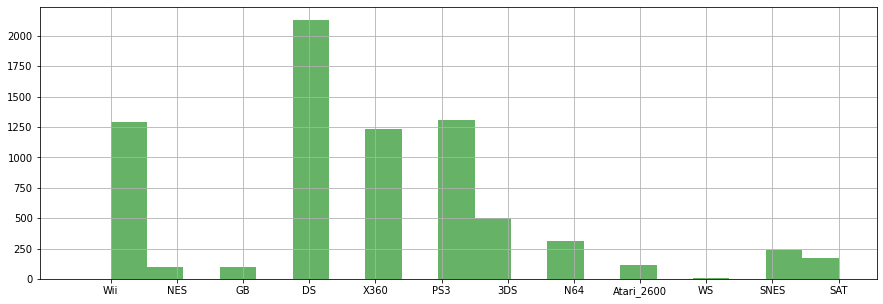

In [14]:
print (df.loc[df.EU_Sales>=25,'Platform'].hist(bins=20, alpha=.6, color='red', figsize=[15, 5]))
print (df.loc[df.EU_Sales<=30,'Platform'].hist(bins=20, alpha=.6, color='green'))

In [15]:
df[['NA_Sales', 'Publisher']].groupby('Publisher').agg(['mean', 'count'])

NA_Sales      
                                  mean count
Publisher                                   
10TACLE Studios               0.030000     2
20th Century Fox Video Games  0.364000     5
3DO                           0.356000     5
49Games                       0.000000     1
505 Games                     0.207714   140
...                                ...   ...
Zushi Games                   0.092353    17
bitComposer Games             0.080000     2
iWin                          0.000000     1
imageepoch Inc.               0.000000     2
mixi, Inc                     0.000000     1

[353 rows x 2 columns]

In [16]:
df[['JP_Sales', 'Publisher']].groupby('Publisher').agg(['mean', 'count'])

JP_Sales      
                                  mean count
Publisher                                   
10TACLE Studios               0.000000     2
20th Century Fox Video Games  0.000000     5
3DO                           0.000000     5
49Games                       0.000000     1
505 Games                     0.009286   140
...                                ...   ...
Zushi Games                   0.000000    17
bitComposer Games             0.000000     2
iWin                          0.000000     1
imageepoch Inc.               0.020000     2
mixi, Inc                     0.860000     1

[353 rows x 2 columns]

In [19]:
features=['Rank','NA_Sales','EU_Sales','P_X360','P_PS3','P_3DS','P_N64']
print(features)
valid = df[features].notna().all(axis=1)
print(len(df), sum(valid))
print(valid.head())
df.head(20)

['Rank', 'NA_Sales', 'EU_Sales', 'P_X360', 'P_PS3', 'P_3DS', 'P_N64']
7505 7505
0    True
1    True
2    True
3    True
4    True
dtype: bool


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,P_GB,P_DS,P_X360,P_PS3,P_3DS,P_N64,P_Atari_2600,P_WS,P_SNES,P_SAT
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,0,0,0,0,0,0,0,0,0,0
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0,0,0,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0,0,0,0,0,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0,0,0,0,0,0,0,0,0,0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,1,0,0,0,0,0,0,0,0,0
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,...,1,0,0,0,0,0,0,0,0,0
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,...,0,1,0,0,0,0,0,0,0,0
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,...,0,0,0,0,0,0,0,0,0,0
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,...,0,0,0,0,0,0,0,0,0,0
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dtree=DecisionTreeClassifier(
    criterion='entropy', 
    random_state=20181105, 
    #max_depth=5,
    min_samples_split=2, 
    #min_samples_leaf=1, 
    #max_features=None, 
    #max_leaf_nodes=None, 
)

dtree.fit(df[features], df['P_GB'])

DecisionTreeClassifier(criterion='entropy', random_state=20181105)

[Text(0.5657216494845361, 0.984375, 'Rank <= 1860.5\nentropy = 0.1\nsamples = 7505\nvalue = [7408, 97]'),
 Text(0.2184278350515464, 0.953125, 'P_PS3 <= 0.5\nentropy = 0.308\nsamples = 960\nvalue = [907, 53]'),
 Text(0.20811855670103094, 0.921875, 'P_X360 <= 0.5\nentropy = 0.371\nsamples = 742\nvalue = [689, 53]'),
 Text(0.19780927835051546, 0.890625, 'P_3DS <= 0.5\nentropy = 0.465\nsamples = 536\nvalue = [483, 53]'),
 Text(0.1875, 0.859375, 'P_N64 <= 0.5\nentropy = 0.494\nsamples = 490\nvalue = [437, 53]'),
 Text(0.17719072164948454, 0.828125, 'NA_Sales <= 0.005\nentropy = 0.528\nsamples = 444\nvalue = [391, 53]'),
 Text(0.05670103092783505, 0.796875, 'Rank <= 652.5\nentropy = 0.822\nsamples = 35\nvalue = [26, 9]'),
 Text(0.04639175257731959, 0.765625, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.06701030927835051, 0.765625, 'Rank <= 898.0\nentropy = 0.894\nsamples = 29\nvalue = [20, 9]'),
 Text(0.05670103092783505, 0.734375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Te

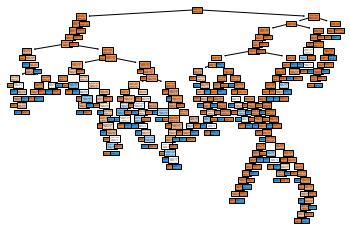

In [22]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=dtree,feature_names=df[features].columns,filled=True)